In [1]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from IPython.display import Image
from six import StringIO
from sklearn import tree
from sklearn.datasets import load_wine, load_iris, load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [3]:
encoded = LabelEncoder()

encoded_weather = encoded.fit_transform(weather)
encoded_temp = encoded.fit_transform(temp)
encoded_label = encoded.fit_transform(play)

print(encoded_weather)
print(encoded_temp)
print(encoded_label)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
features = list(zip(encoded_weather, encoded_temp))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [5]:
model = GaussianNB()

model.fit(features, encoded_label)

sample_prediction = model.predict([[0, 2], [1, 1]])
print("sample prediction:", sample_prediction)

prediction = model.predict(features)
print(classification_report(encoded_label, prediction))

sample prediction: [1 1]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



## Gaussian Naive Bayes with Multiple Labels

In [6]:
wine = load_wine()

print("feature names:", wine.feature_names)
print("class names:", wine.target_names)

feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
class names: ['class_0' 'class_1' 'class_2']


In [7]:
wine.data.shape

(178, 13)

In [8]:
X_train, X_dev, y_train, y_dev = train_test_split(wine.data, wine.target, test_size=.3, random_state=109)
print(f"Training with {X_train.shape[0]} data.. Validating with {X_dev.shape[0]}.")

Training with 124 data.. Validating with 54.


In [9]:
def train_model(X, y, model, test_size=.3):
    X_train, X_dev, y_train, y_dev = train_test_split(
        X, y, test_size=test_size, random_state=11
    )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_dev.shape[0]}..")
    
    start = time()
    model.fit(X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:3f}s")

    train_prediction = model.predict(X_train)
    dev_prediction = model.predict(X_dev)

    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Development performance:")
    print(classification_report(y_dev, dev_prediction))

In [10]:
model = GaussianNB()
train_model(wine.data, wine.target, model)

Training with 124 data.. Validating with 54..
Done training GaussianNB in 0.001373s
Training performance:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      1.00      0.99        49
           2       1.00      1.00      1.00        37

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124

Development performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.86      0.93        22
           2       0.85      1.00      0.92        11

    accuracy                           0.94        54
   macro avg       0.93      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



## Decision Tree

In [11]:
diabetes = pd.read_csv("data/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
feat_cols = ["Pregnancies", "Glucose", "BloodPressure", "Insulin",
             "BMI", "DiabetesPedigreeFunction", "Age"]
X = diabetes[feat_cols]
y = diabetes.Outcome

In [14]:
model = DecisionTreeClassifier(random_state=11)
train_model(X, y, model)

Training with 537 data.. Validating with 231..
Done training DecisionTreeClassifier in 0.010739s
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       186

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

Development performance:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       149
           1       0.60      0.55      0.57        82

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.71      0.71      0.71       231



In [15]:
def visualize_tree(model, class_names):
    dot_data = StringIO()
    tree.export_graphviz(model, class_names=["0", "1"], out_file=dot_data,
                         feature_names=feat_cols, filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

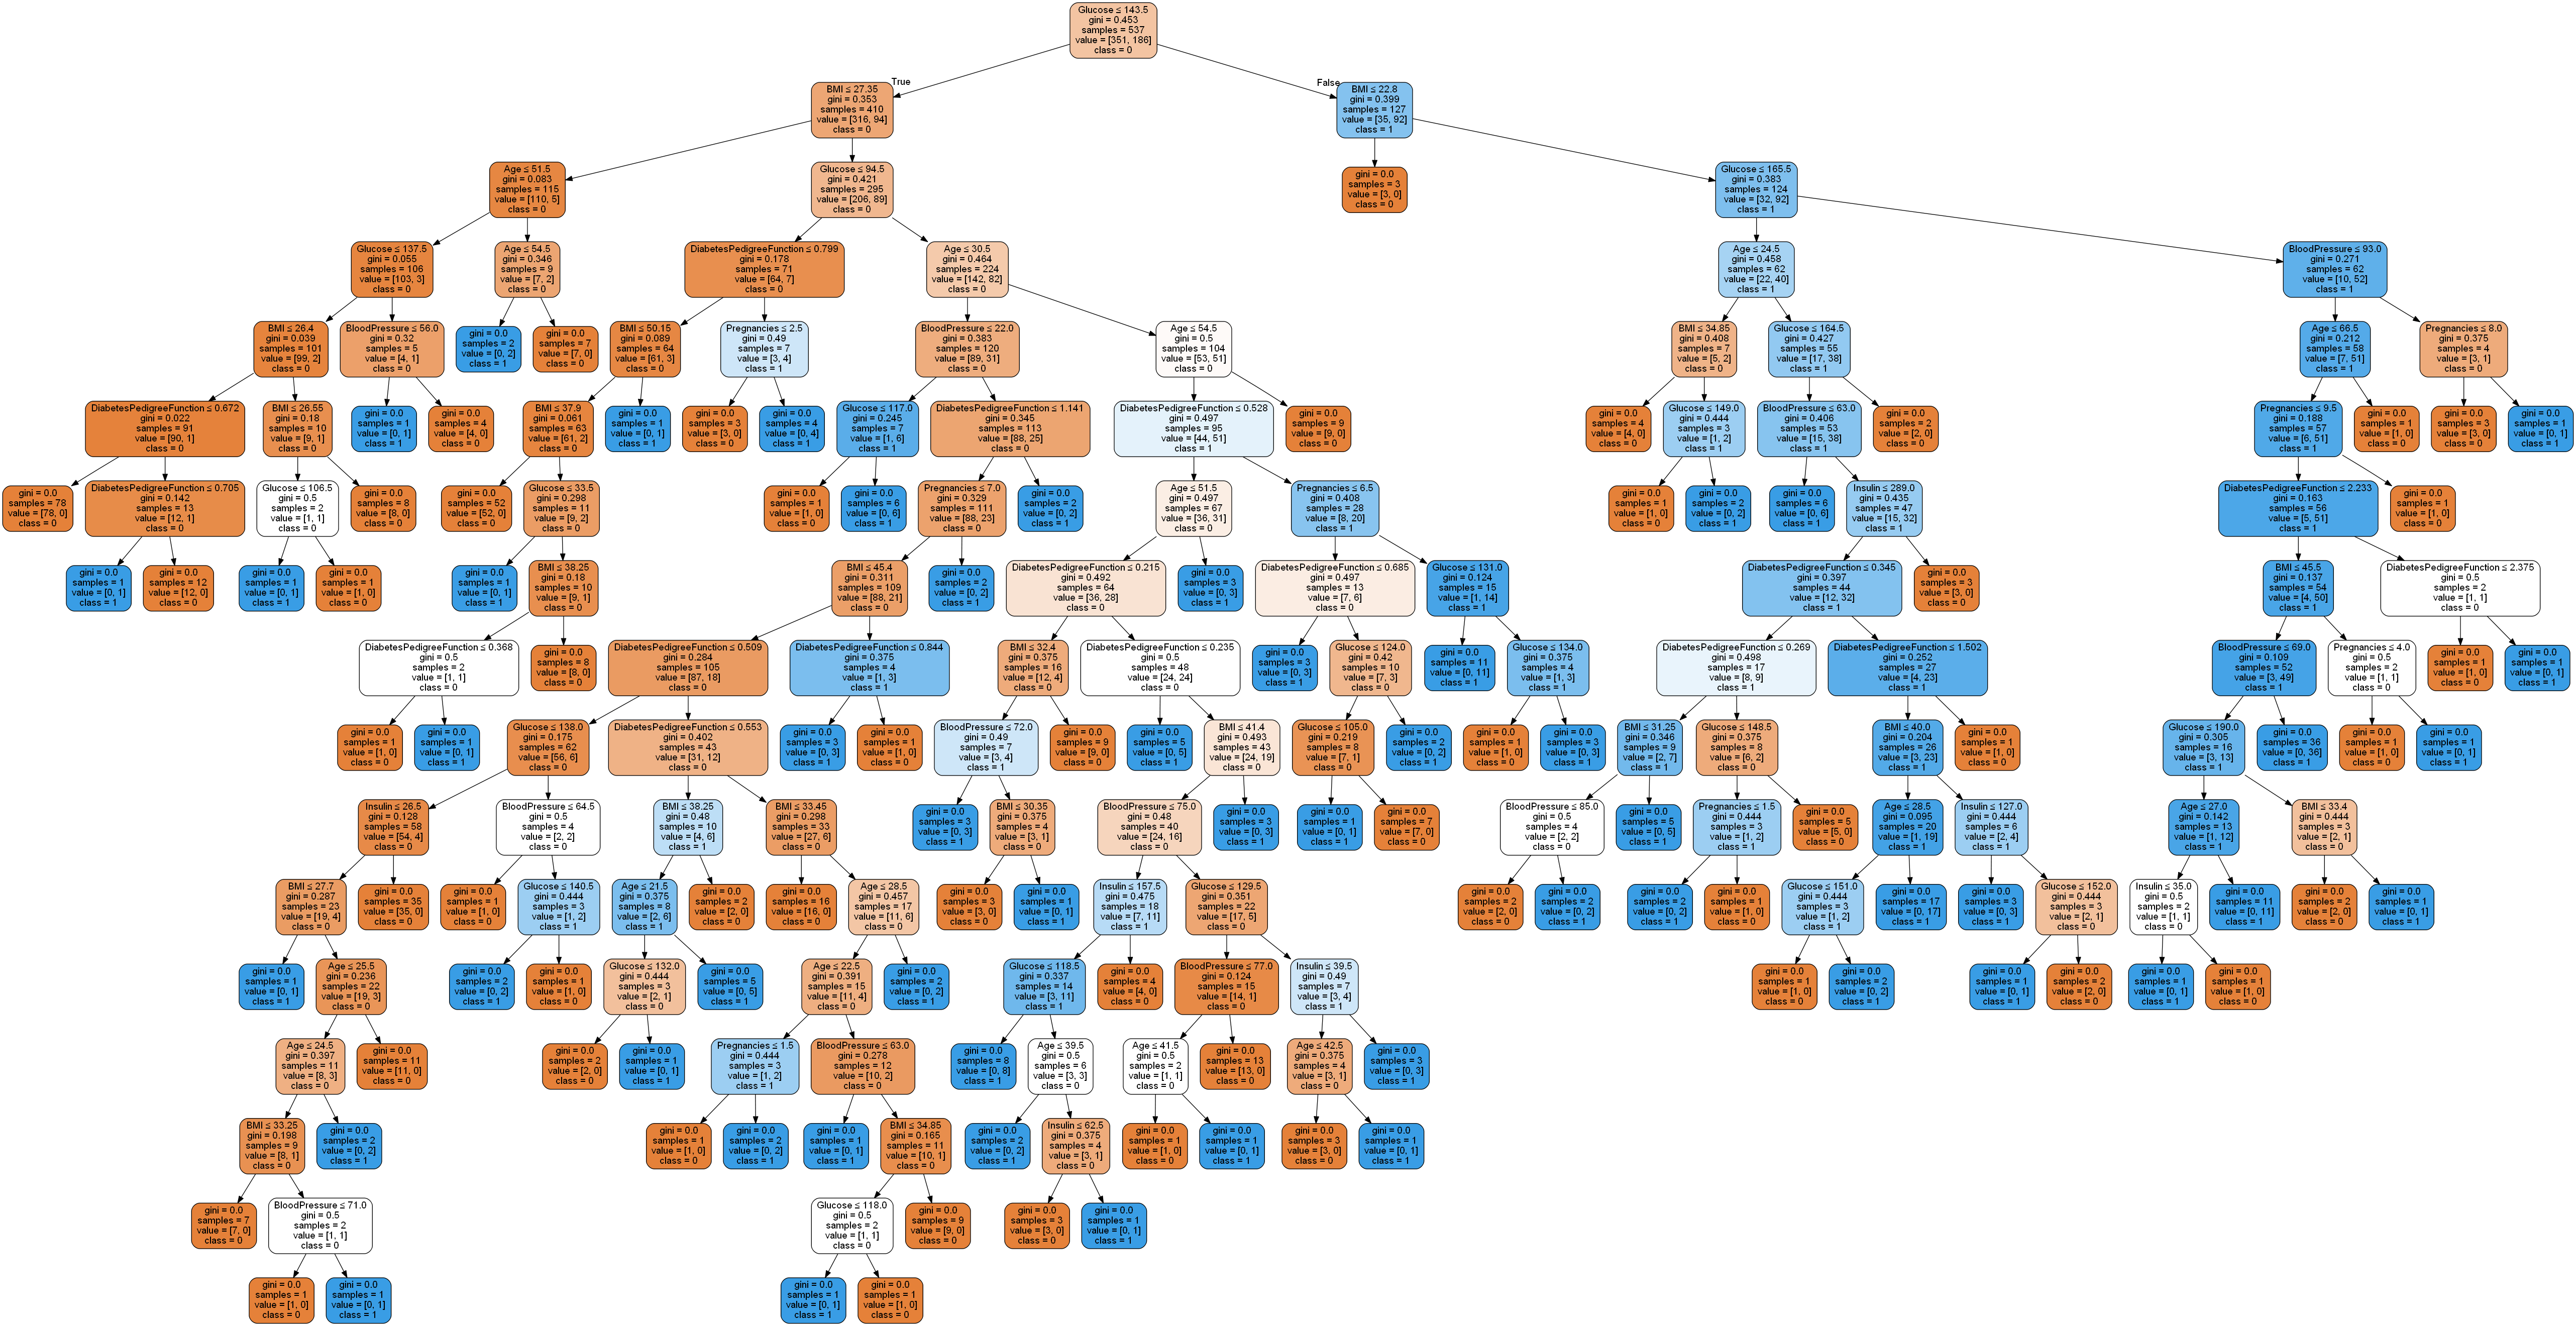

In [17]:
graph = visualize_tree(model, ["0", "1"])
Image(graph)

Training with 537 data.. Validating with 231..
Done training DecisionTreeClassifier in 0.008178s
Training performance:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       351
           1       0.68      0.83      0.75       186

    accuracy                           0.81       537
   macro avg       0.79      0.81      0.80       537
weighted avg       0.82      0.81      0.81       537

Development performance:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       149
           1       0.65      0.67      0.66        82

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



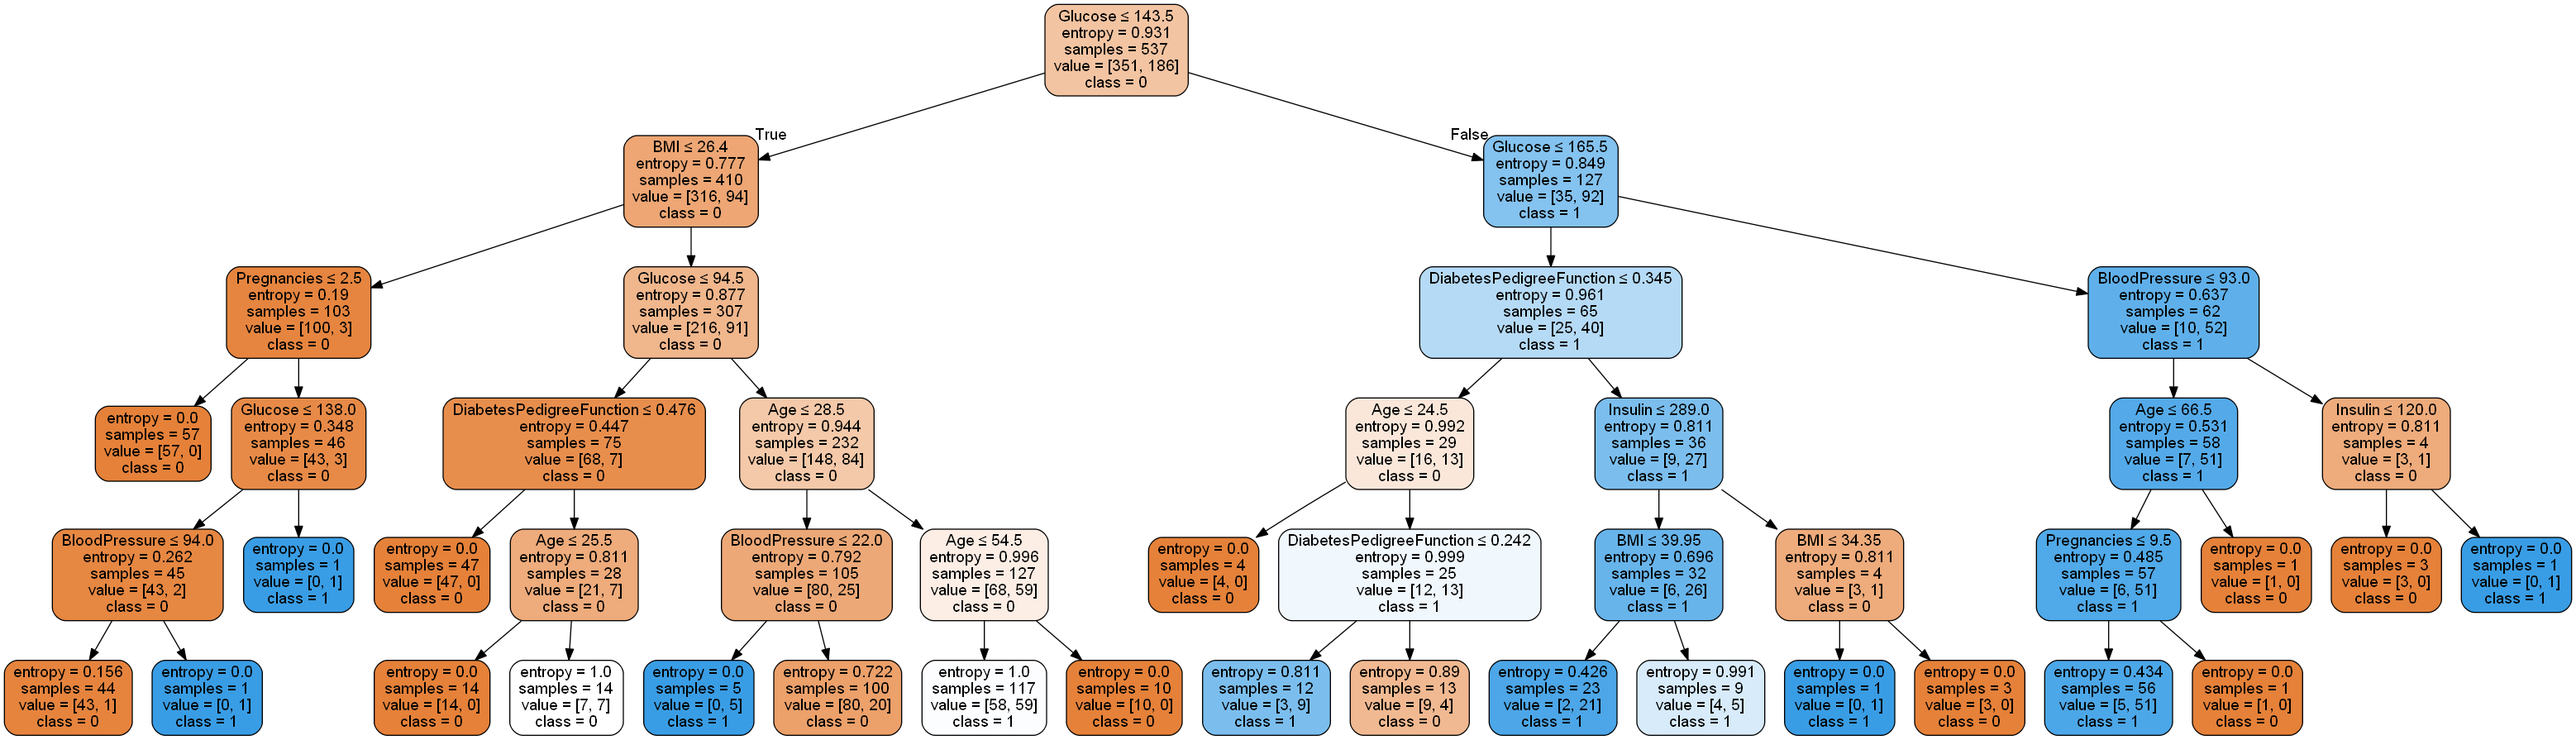

In [18]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
train_model(X, y, model)
graph = visualize_tree(model, ["0", "1"])
Image(graph)

## Random Forest

In [19]:
iris = load_iris()
df_iris = pd.DataFrame({
    "sepal_length": iris.data[:, 0],
    "sepal_width": iris.data[:, 1],
    "petal_length": iris.data[:, 2],
    "petal_width": iris.data[:, 3],
    "species": iris.target
})
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
model = DecisionTreeClassifier()
train_model(df_iris.drop(columns="species"), df_iris["species"], model)

Training with 105 data.. Validating with 45..
Done training DecisionTreeClassifier in 0.008889s
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        33

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Development performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      0.86      0.86        14
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [21]:
model = RandomForestClassifier()
train_model(df_iris.drop(columns="species"), df_iris["species"], model)

Training with 105 data.. Validating with 45..
Done training RandomForestClassifier in 0.310707s
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        33

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Development performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      0.86      0.86        14
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [22]:
iris_feat_importance = pd.Series(model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
iris_feat_importance

petal width (cm)     0.442958
petal length (cm)    0.436356
sepal length (cm)    0.093851
sepal width (cm)     0.026835
dtype: float64

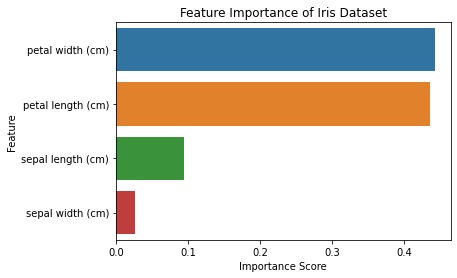

In [23]:
sns.barplot(x=iris_feat_importance, y=iris_feat_importance.index)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance of Iris Dataset")
plt.show()

## Support Vector Machines

In [24]:
cancer = load_breast_cancer()
print("Features:", cancer.feature_names)
print("Lables:", cancer.target_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Lables: ['malignant' 'benign']


In [25]:
print("dataset shape:", cancer.data.shape)

dataset shape: (569, 30)


In [26]:
model = SVC(kernel="linear")
train_model(cancer.data, cancer.target, model)

Training with 398 data.. Validating with 171..
Done training SVC in 2.016703s
Training performance:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       151
           1       0.97      0.98      0.98       247

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Development performance:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        61
           1       0.94      0.96      0.95       110

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



## Comparing All Algorithms

In [27]:
df_train = pd.read_csv("data/train.csv")
print("dataset shape:", df_train.shape)

dataset shape: (614, 13)


In [28]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
df_train.fillna(df_train.mean(), inplace=True)

In [31]:
df_train.Gender.fillna(df_train.Gender.mode()[0], inplace=True)
df_train.Married.fillna(df_train.Married.mode()[0], inplace=True)
df_train.Dependents.fillna(df_train.Dependents.mode()[0], inplace=True)
df_train.Self_Employed.fillna(df_train.Self_Employed.mode()[0], inplace=True)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [33]:
X = df_train.drop(columns="Loan_Status")
y = df_train.Loan_Status

In [34]:
X = pd.get_dummies(X)

In [35]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [36]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier()
]

In [37]:
for model in models:
    print(f"=== Using {model.__class__.__name__} ===")
    train_model(X, y, model)

=== Using LogisticRegression ===
Training with 429 data.. Validating with 185..
Done training LogisticRegression in 0.118896s
Training performance:
              precision    recall  f1-score   support

           N       0.90      0.43      0.58       128
           Y       0.80      0.98      0.88       301

    accuracy                           0.82       429
   macro avg       0.85      0.70      0.73       429
weighted avg       0.83      0.82      0.79       429

Development performance:
              precision    recall  f1-score   support

           N       0.87      0.52      0.65        64
           Y       0.79      0.96      0.87       121

    accuracy                           0.81       185
   macro avg       0.83      0.74      0.76       185
weighted avg       0.82      0.81      0.79       185


C:\Users\Windi aulia\anaconda3\envs\hacktiv8-env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Using DecisionTreeClassifier ===
Training with 429 data.. Validating with 185..
Done training DecisionTreeClassifier in 0.034036s
Training performance:
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       128
           Y       1.00      1.00      1.00       301

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Development performance:
              precision    recall  f1-score   support

           N       0.66      0.58      0.62        64
           Y       0.79      0.84      0.82       121

    accuracy                           0.75       185
   macro avg       0.73      0.71      0.72       185
weighted avg       0.75      0.75      0.75       185

=== Using RandomForestClassifier ===
Training with 429 data.. Validating with 185..
Done training RandomForestClassifier in 0.485875s
Training performance:
        

C:\Users\Windi aulia\anaconda3\envs\hacktiv8-env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windi aulia\anaconda3\envs\hacktiv8-env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windi aulia\anaconda3\envs\hacktiv8-env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Training performance:
              precision    recall  f1-score   support

           N       0.63      0.31      0.42       128
           Y       0.76      0.92      0.83       301

    accuracy                           0.74       429
   macro avg       0.70      0.62      0.63       429
weighted avg       0.72      0.74      0.71       429

Development performance:
              precision    recall  f1-score   support

           N       0.39      0.17      0.24        64
           Y       0.66      0.86      0.75       121

    accuracy                           0.62       185
   macro avg       0.53      0.52      0.49       185
weighted avg       0.57      0.62      0.57       185

